Topic: [Leaky-Integrate-and-Fire model](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html)

Information: [Chapter 1 Section 3 -- LIF model](http://neuronaldynamics.epfl.ch/online/Ch1.S3.html)

[Scipy package doc](https://docs.scipy.org/doc/scipy/reference/signal.html)

[Jupyter Markdown Cheatsheet](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Other's python exercise Answer
+ [Timothysit](https://www.github.com/Timothysit/neuronal_dynamics_exercises)
+ [disadone](https://github.com/disadone/neuronaldynamics-epfl/tree/master/neuronaldynamics-book-exercises)



## Overview 

Exercise 1: calculate the minimum step current $I_0$ to elicitate a spike

Exercise 2: f-I curve<br>
+ Estimate by equation | calculate by input multiple I and gather f. Compare exsimation withreal output of the model's f-I curve with refractory period
+ Conclusion: For step current input, spike frequency increase with the input current

Exercise 3: learn to read parameters from "experimental membrane voltage".

Exercise 4: sinusoidal current input that cause subthreshold response
+ voltage response shows an adaptation
+ voltage oscillation's amplitude & input frequency
+ voltage oscillation's phase shift to input & input frequency
+ LIF is a low-pass filter





nr of spikes: 0


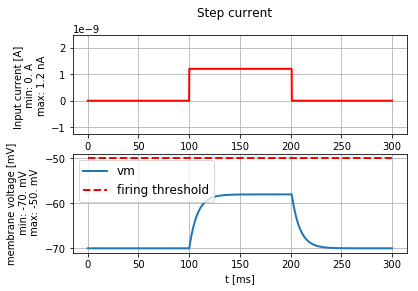

nr of spikes: 5


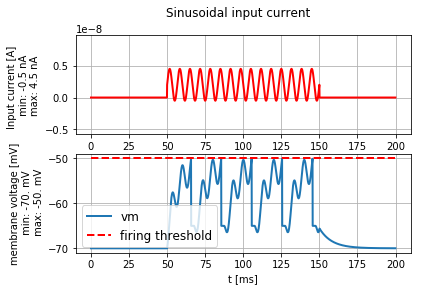

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [73]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

# simulate_LIF_neuron()
# change parameters

## 1.1. Exercise: minimal current

In the absence of an input current, a LIF neuron has a constant membrane voltage `V_REST`. If an input current drives `vm` above the firing threshold, a spike is generated. Then, `vm` is reset to `V_RESET` and the neuron ignores any input during the refractroy period.

### 1.1.1. Question: minimal current (calculation)
For the default neuron parameters (see above), compute the minimal amplitude `Imin` of a step current to elicitate a spike. 

You can access the default values in your code and do the calculation with correct units.

<br>
<font color='green'>
$u(t)$ solution of a constant current input $I_0$ is:

$u(t)=u_0+R*I_0(1-exp(-\frac{t}{\tau}))$
<br>
when $t \rightarrow \infty$,$ \lim_{t \rightarrow \infty}u(t)=u_0+R*I_0$
<br>
Therefore, 

$I_{min}=\frac{\theta-u_0}{R}$
</font>


In [130]:
# access the default values
V_REST = LIF.V_REST
V_RESET = LIF.V_RESET
FIRING_THRESHOLD = LIF.FIRING_THRESHOLD
MEMBRANE_RESISTANCE = LIF.MEMBRANE_RESISTANCE 
MEMBRANE_TIME_SCALE = LIF.MEMBRANE_TIME_SCALE
ABSOLUTE_REFRACTORY_PERIOD = LIF.ABSOLUTE_REFRACTORY_PERIOD 
print(FIRING_THRESHOLD-V_REST)
print(float(MEMBRANE_RESISTANCE))
I_min = (FIRING_THRESHOLD-V_REST)/MEMBRANE_RESISTANCE

print("minimum current to elicitate a spike: {}".format(I_min))

20. mV
10000000.0
minimum current to elicitate a spike: 2. nA


### 1.1.2. Question: minimal current (simulation)
Use the value `Imin` you’ve computed and verify your result: inject a step current of amplitude `Imin` for 100ms into the LIF neuron and plot the membrane voltage. vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. 

Use this code block, but make sure you understand it and you’ve read the docs of the functions: `LIF.simulate_LIF_neuron()`
`input_factory.get_step_current()` `plot_tools.plot_voltage_and_current_traces()`

nr of spikes: 0


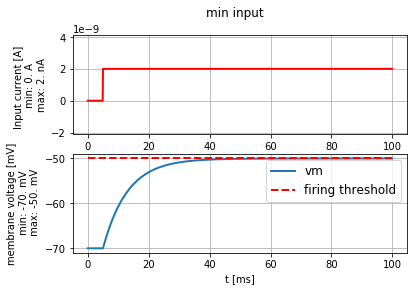

In [12]:
# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

## 1.2. Exercise: f-I Curve
For a constant input current `I`, a LIF neuron fires regularly with firing frequency `f`. If the current is to small `(I<Imin)`, f is 0Hz; for larger I the rate **increases**. A neuron’s firing-rate versus input-amplitude relationship is visualized in an **“f-I curve”**.

### 1.2.1. Question: f-I Curve and refractoryness
We now study the f-I curve for a neuron with a refractory period of 3ms (see LIF.simulate_LIF_neuron() to learn how to set a refractory period).

1.Sketch the f-I curve you expect to see.
<br>
<font color='green'>
To calculate the frequency:
<br>
$\theta=u_0+R*I_0(1-exp(-\frac{T}{\tau}))$
<br>
$T=-\tau \cdot ln(1-\frac{\theta-u_0}{R*I_0})+T_{refractory}$
<br>

</font>

2.What is the maximum rate at which this neuron can fire?

<font color='green'>

$\lim_{I \rightarrow \infty}\frac{1}{T}=\frac{1}{T_{refractory}}$

</font>

3.Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

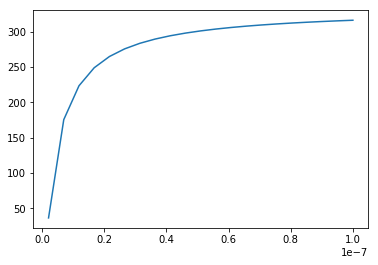

In [78]:
# 1. 2.
I = np.linspace(2.1, 100, 21)*b2.nA
T_refractory = 3 *b2.ms
T = -MEMBRANE_TIME_SCALE * np.log(1-(FIRING_THRESHOLD - V_REST)/MEMBRANE_RESISTANCE/I) + T_refractory
matplotlib.pyplot.plot(I,1/T)     


In [80]:
# 3.
spike_frequency=[];
for ii in range(0,100,5):

    step_current = input_factory.get_step_current(
        t_start=5, t_end=500, unit_time=b2.ms,
        amplitude=ii*b2.nA)  
    
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 500 * b2.ms, abs_refractory_period=3*b2.ms)
    
    # plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
    # print("nr of spikes: {}".format(spike_monitor.count[0]))
    # print("spike frequency: {}" .format(int(spike_monitor.count[0]/(500 * b2.ms))))
    # plt.show()
    
    spike_frequency.append(int(spike_monitor.count[0]/(500 * b2.ms)));  

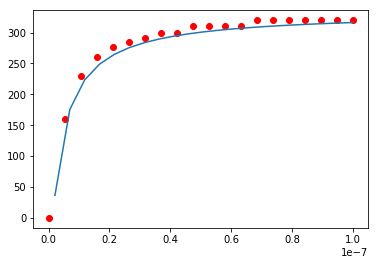

In [82]:
# plot f-I curve
matplotlib.pyplot.plot(np.linspace(0,100,20)*b2.nA,spike_frequency,'ro')     
matplotlib.pyplot.plot(I,1/T)     


## 1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

### 1.3.1. Question: “Read” the LIF parameters out of the vm plot
1. Get a random parameter **set**.
2. Create an input current of your choice.
3. Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.
4. Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
5. Compare your estimates with the true values.

<font color='green'>

1. resting poential | reset voltage | firing threshold | absolute refractory period:

Parameters easy to read directly from u-t curve
<br>
2. Membrane resistance | membrane time-scale:
read the spike period from the equation, then calculate by:
<br>
$\frac{1}{f}=T = -\tau \cdot ln(1-\frac{\theta-u_0}{R \cdot I_0})$ 
<br>
We need to set 2 current inputs and long input duration that can trigger spikes, so we can read out the spike period
and solve $R$ and $\tau$

<br>
3. absolute refractory period:
draw f-I curve, see where f stable at when I are extremely big.

</font>


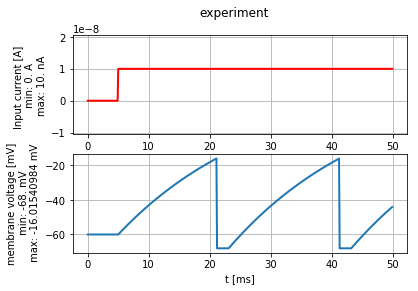

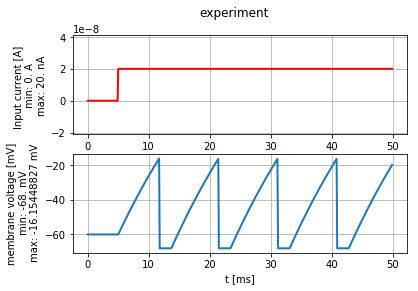

In [148]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)
I_input = [10,20]* b2.namp

for ii in I_input:

    # define your test current
    test_current = input_factory.get_step_current(
        t_start=5, t_end=500, unit_time=b2.ms, amplitude= ii )

    # probe the neuron. pass the test current AND the random params to the function
    state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

    # plot
    plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")
    plt.show()


In [153]:
# print the parameters to the console and compare with your estimates
# parameter read directly from plot
V_REST = -60*b2.mV
V_RESET = -68*b2.mV
FIRING_THRESHOLD = -16*b2.mV
ABSOLUTE_REFRACTORY_PERIOD = 2*b2.ms

esti_period = [16*b2.ms,7*b2.ms]

# to solve time-scale
# scipy can get result but less accuracy
from scipy.optimize import fsolve
 
def solve_function(unsolved_value):
    x,y=unsolved_value[0],unsolved_value[1]
    return [

        float( (FIRING_THRESHOLD-V_REST)/I_input[0] )/x-1+exp(-float(esti_period[0])/y),
        float( (FIRING_THRESHOLD-V_REST)/I_input[1] )/x-1+exp(-float(esti_period[1])/y)
        
        # 0.044/x/20/1e-9 - 1+exp(-7*1e-3/y)
    ]
        # 0.044/10/1e-9/x - 1+exp(-16*1e-3/y),

[r,tau] = fsolve(solve_function,[1e7, 1e-2])
print("Estimate R: {:.2f} Mohm".format(r/1e6))
print("Estimate tau: {:.2f} ms".format(tau/1e-3))

# show the random parameter set
LIF.print_obfuscated_parameters(random_parameters)



'''
# sympy can get complete and accurate result but is too slow

from sympy import *

r = Symbol('r')
tau = Symbol('tau')
print( solve([float(FIRING_THRESHOLD - V_REST)/r/float(I_input[0]) - 1+exp(-float(esti_period[0])/tau),
              float(FIRING_THRESHOLD - V_REST)/r/float(I_input[1]) - 1+exp(-float(esti_period[1])/tau)],[r,tau])
     )

print("extimate membrane resistance,{}".format(r))
print("extimate time scale,{}".format(tau))


'''


Estimate R: 11.09 Mohm
Estimate tau: 31.67 ms
Resting potential: -60. mV
Reset voltage: -68. mV
Firing threshold: -16. mV
Membrane resistance: 9. Mohm
Membrane time-scale: 24. ms
Absolute refractory period: 2. ms


'\n# sympy can get complete and accurate result but is too slow\n\nfrom sympy import *\n\nr = Symbol(\'r\')\ntau = Symbol(\'tau\')\nprint( solve([float(FIRING_THRESHOLD - V_REST)/r/float(I_input[0]) - 1+exp(-float(esti_period[0])/tau),\n              float(FIRING_THRESHOLD - V_REST)/r/float(I_input[1]) - 1+exp(-float(esti_period[1])/tau)],[r,tau])\n     )\n\nprint("extimate membrane resistance,{}".format(r))\nprint("extimate time scale,{}".format(tau))\n\n\n'

In [151]:
[r,tau]

[2.952251085593041e+22, -63884573832112.922]

## 1.4. Exercise: Sinusoidal input current and subthreshold response
In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

### 1.4.1. Question
Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

nr of spikes: 0


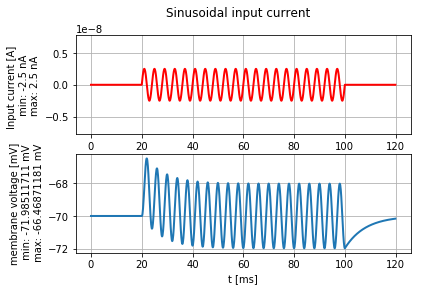

In [124]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(t_start = 200, 
                                                          t_end = 1000, 
                                                          unit_time=0.1 * b2.ms,
                                                          amplitude= 2.5 * b2.namp, 
                                                          frequency=250*b2.Hz,
                                                          direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, 
                                                         simulation_time = 120 * b2.ms, 
                                                         firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 1.4.2. Question
For input frequencies between 10Hz and 1 kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

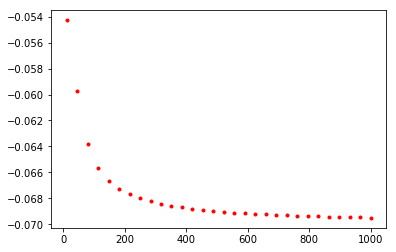

In [86]:
fre_inputs = np.linspace(10,1000,30)*b2.Hz

amp= []
from scipy.signal import argrelmax
for fre in fre_inputs:
    # note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
    sinusoidal_current = input_factory.get_sinusoidal_current(t_start = 0, 
                                                              t_end = 1200, 
                                                              unit_time=0.1 * b2.ms,
                                                              amplitude= 2.5 * b2.namp, 
                                                              frequency= fre,
                                                              direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, 
                                                             simulation_time = 120 * b2.ms, 
                                                             firing_threshold=0*b2.mV)

    # plot the membrane voltage
    # plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
    # print("nr of spikes: {}".format(spike_monitor.count[0]))
 
    voltage = state_monitor.v[0];
    a=max(voltage[int(len(voltage)*0.6):len(voltage)]) # spikes need time to stable, we get maximum potential from last 40% of the record
    amp.append(a)
    
plt.plot(fre_inputs, amp,'r.')

### 1.4.3. Question

For input frequencies between 10Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.

*(It is not straight forward to automatically determine the phase shift in a script. For this exercise, simply get it “visually” from your plot. If you want to automatize the procedure in your Python script you could try the function `scipy.signal.correlate()`.)*

<font color='green'>
<br>
[Example of calculating phase shift by cross-correlation](https://www.coder.work/article/342904):
<br>
<br>
What is [cross-correlation](https://www.usna.edu/Users/oceano/pguth/md_help/html/time0alq.htm):
<br>
calculate correlation coeffiency with different lag. The lag leading to max cc is the bast match

</font>


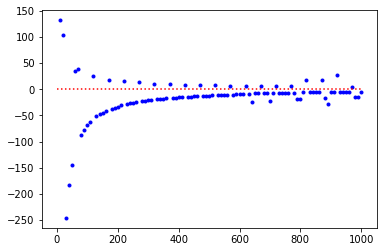

In [107]:
fre_inputs = np.linspace(10,1000,100)*b2.Hz
phase_shift= []
from scipy.signal import correlate
for fre in fre_inputs:
    # note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
    sinusoidal_current = input_factory.get_sinusoidal_current(t_start = 0, 
                                                              t_end = 1200, 
                                                              unit_time=0.1 * b2.ms,
                                                              amplitude= 2.5 * b2.namp, 
                                                              frequency= fre,
                                                              direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, 
                                                             simulation_time = 120 * b2.ms, 
                                                             firing_threshold=0*b2.mV)

    # plot the membrane voltage
    # plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
    # print("nr of spikes: {}".format(spike_monitor.count[0]))

    voltage = state_monitor.v[0];
    current = sinusoidal_current.values; # current has 2 values more than voltage
    current = np.delete(current,[0,1])
    xcorr = correlate(voltage, current)
    
    nsamples = voltage.size
    dt = np.arange(1-nsamples, nsamples)
    ps = dt[xcorr.argmax()]
    phase_shift.append(ps)
    
plt.plot(fre_inputs,phase_shift,'b.')  
plt.plot([0,1000],[0,0],'r:')


### 1.4.4. Question

To what type of filter (High-Pass, Low-Pass) does this correspond to?
<font color = 'green'>
a filter will have a cut-off frequency(threshold)
<br>
High-Pass filter: lower reactance for signal with frequency higher than the cut-off frequency
<br>
Low-Pass filter: lower reactance for signal with frequency lower than the cut-off frequency
<br><br>
Because input current with *lower frequency* can trigger spike sequence of *higher amplitude*, therefore, it is a **low-pass filter**
</font>